In [ ]:
# Predict Calorie Expenditure--> Notebook


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


# Libraries -->

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


# ML Models- Sklearn/Scikit Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
import warnings
warnings.simplefilter('ignore')

# Read and Understand the data -->

*Load the Data -*

In [4]:
train_data =pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')
test_data= pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')
submission= pd.read_csv('/kaggle/input/playground-series-s5e5/sample_submission.csv')



*Rows and col-*

In [5]:
train_data.shape
test_data.shape

(250000, 8)

In [6]:
test_data

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


*correlation matrix -
from this we can have the look on how features are correlated to each other , from their we can include or exclude on the basis from their relation*

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


# Feature engineering and EDA

In [9]:

train_data['temp_per_minute']=train_data['Body_Temp']/ train_data['Duration']
test_data['temp_per_minute']=test_data['Body_Temp']/ test_data['Duration']

In [10]:
 # Step 1: Define age groups
def age_group(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle Aged'
    else:
        return 'Senior'


    
train_data['age_group']=train_data['Age'].apply(age_group)
duration_by_age_grp_train=train_data.groupby('age_group')['Duration'].mean().to_dict()
train_data['Exercise_duration_by_age_group']=train_data['age_group'].map(duration_by_age_grp_train)

test_data['age_group']=test_data['Age'].apply(age_group)
duration_by_age_grp_test=test_data.groupby('age_group')['Duration'].mean().to_dict()
test_data['Exercise_duration_by_age_group']=test_data['age_group'].map(duration_by_age_grp_test)


train_age_Group_map = {'Teen': 1, 'Young Adult': 0, 'Adult': 2, 'Middle Aged': 3, 'Senior': 4}
train_data['Age_Group'] = train_data['age_group'].map(train_age_Group_map)
train_data['Age_Group'] = train_data['age_group'].map(train_age_Group_map)

test_age_Group_map = {'Teen': 1, 'Young Adult': 0, 'Adult': 2, 'Middle Aged': 3, 'Senior': 4}
test_data['Age_Group'] = test_data['age_group'].map(test_age_Group_map)
test_data['Age_Group'] = test_data['age_group'].map(test_age_Group_map)

In [11]:
test_data['Sex'] = test_data['Sex'].astype('category')
test_data['age_group'] = test_data['age_group'].astype('category')



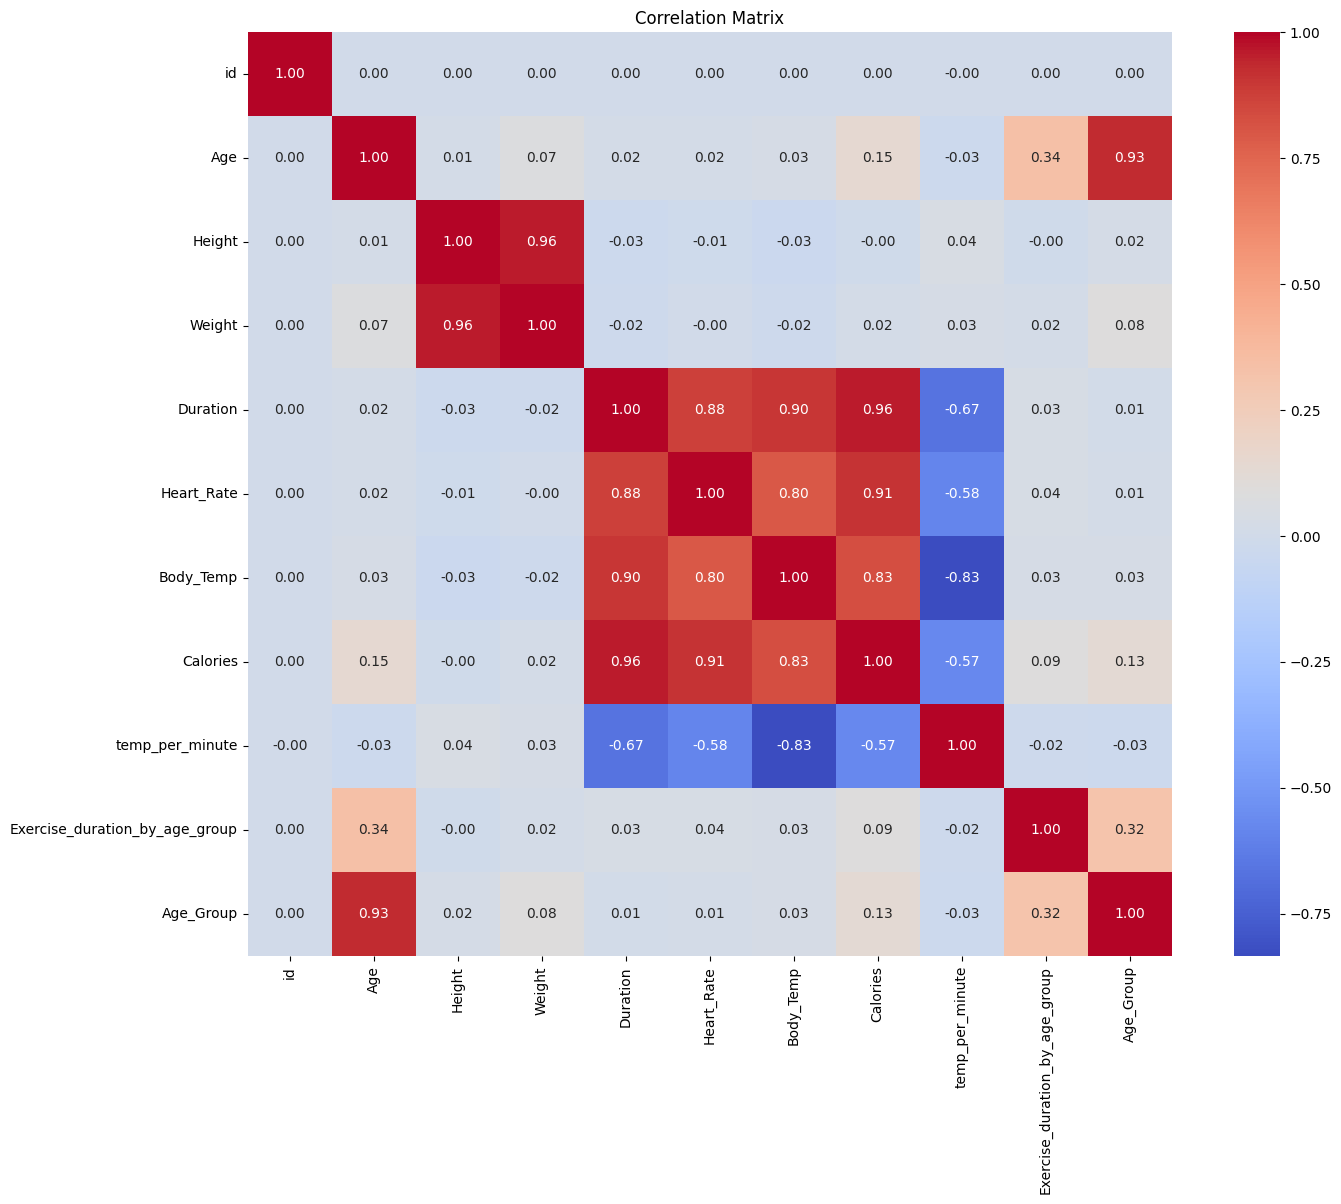

In [12]:
corr_matrix=train_data.corr(numeric_only=True)
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",square=True)
plt.title("Correlation Matrix")
plt.show()

In [13]:
# Drop 'id' (and 'Sex' if you don't want to use it)
train_data = train_data.drop(['id'], axis=1)



# DIMENSIONALITY REDUCTION
> USING PCA

In [ ]:
# using pca
# load dataset and scale them -why?
# -->PCA is sensitive to the variance of each feature, and without scaling features with larger variances  
#   might dominate the first principal components, leading to biased results. 


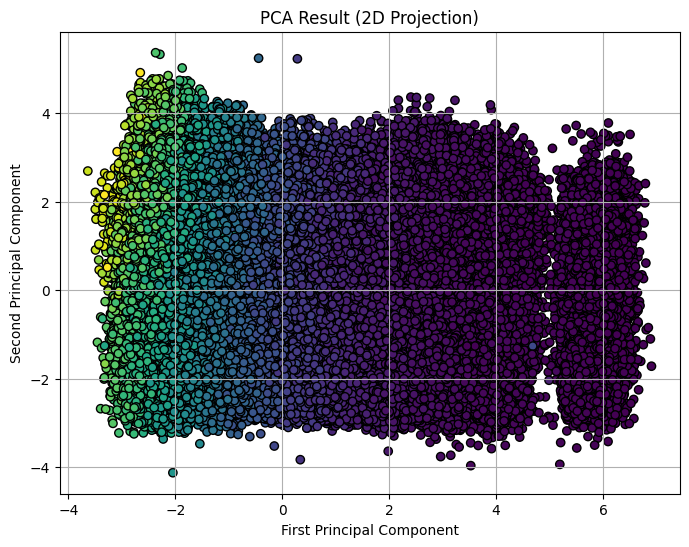

Explained variance ratio: [0.41814303 0.24505653]


In [14]:


# Load Dataset and Scale them

feature_columns = ['Body_Temp', 'Heart_Rate', 'Age', 'Duration', 
                   'temp_per_minute', 'Exercise_duration_by_age_group','Height', 'Weight']
X = train_data[feature_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = train_data['Calories']


# Conduct PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Plot

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result (2D Projection)')
plt.grid(True)
plt.show()


print("Explained variance ratio:", pca.explained_variance_ratio_)

In [15]:
# checking the loading i.e contribution of each feature to each principal component
loadings= pd.DataFrame(pca.components_.T,index=feature_columns,columns=['PC1','PC2'])
print(loadings)

                                     PC1       PC2
Body_Temp                      -0.529490  0.021241
Heart_Rate                     -0.487977  0.036330
Age                            -0.022331  0.078410
Duration                       -0.517387  0.024329
temp_per_minute                 0.458341 -0.008306
Exercise_duration_by_age_group -0.029615  0.038662
Height                          0.037627  0.701833
Weight                          0.030993  0.705235


> we will use t-sne now

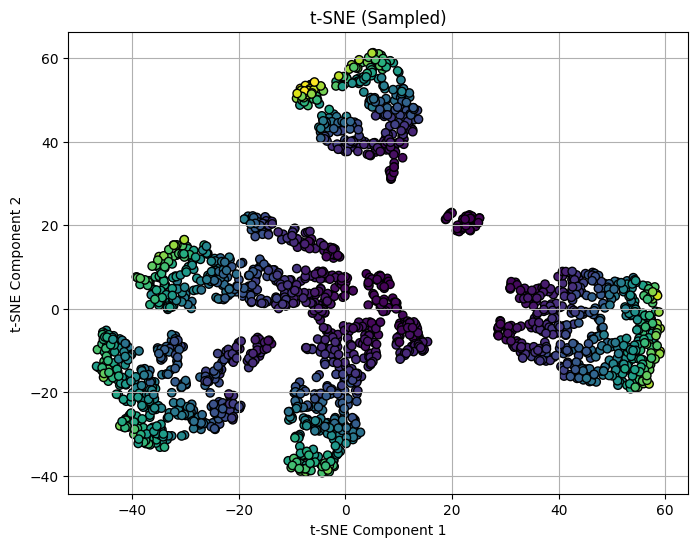

In [16]:
# Using t-SNE

# Select Features 
feature_columns = ['Body_Temp', 'Heart_Rate', 'Age', 'Duration', 
                   'temp_per_minute', 'Exercise_duration_by_age_group', 'Height', 'Weight']
sample_df = train_data.sample(n=2000, random_state=42)
X_sample = sample_df[feature_columns]
y_sample = sample_df['Calories'] # For coloring (optional)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis', edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE (Sampled)')
plt.grid(True)
plt.show()

In [18]:

    train_data['Gender'] = train_data['Sex'].map({'male': 1, 'female': 0})
test_data['Gender'] = test_data['Sex'].map({'male': 1, 'female': 0})
   

In [19]:
print(train_data['Gender'].dtype)
print(test_data['Gender'].dtype)


int64
category


In [20]:
# as u can see test_data is of category type with numerical values , so we will convert it into int , in next move we can multply it
test_data['Gender']=test_data['Gender'].astype(int)

# New Features

In [21]:
for df in [train_data, test_data]:
    df['Gender_Age'] = df['Gender'] * df['Age']
    df['Height_m'] = df['Height'] / 100
    df['BMI'] = df['Weight'] / (df['Height_m'] ** 2) ## Good for linear regression
    df['WtHt_Ratio'] = df['Weight'] / df['Height'] ## Works well with regression (Polynomial)
    df['Gender_Weight'] = df['Gender'] * df['Weight']
    df['BMI_Age'] = df['BMI'] * df['Age'] # Good for polynomial regression
    df['Intensity'] = df['Heart_Rate'] / df['Duration']
    df['Heart_Rate_Dur'] = df['Heart_Rate'] * df['Duration'] ## Also good for polynomial

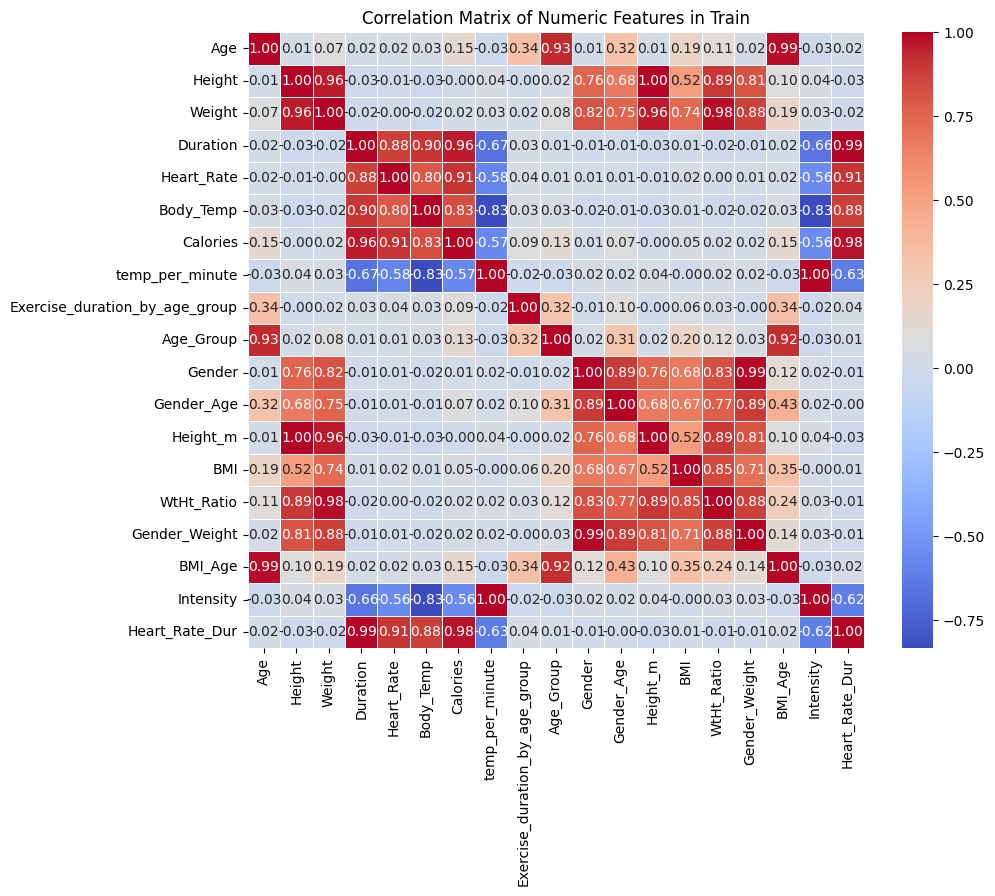

In [22]:
# Select only numeric columns
numeric_df = train_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features in Train')
plt.show()

> in test_data

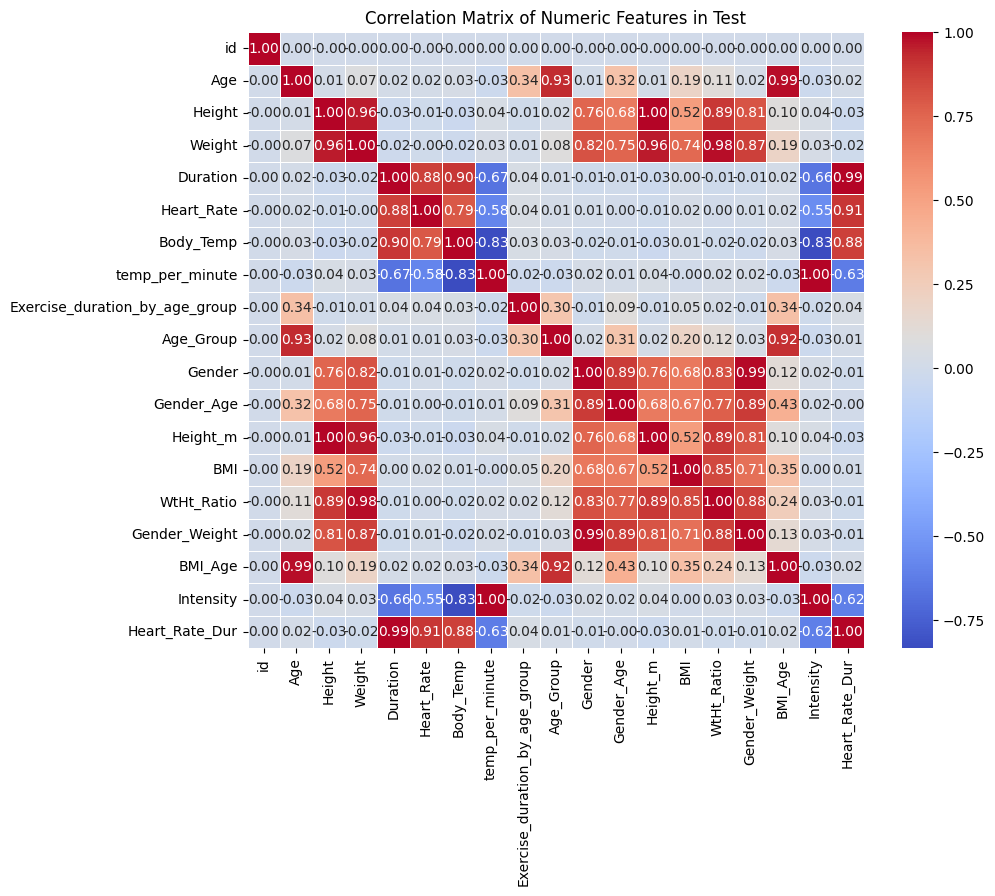

In [24]:
# Select only numeric columns
numeric_df_test =test_data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix_test = numeric_df_test.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_test, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features in Test')
plt.show()

In [25]:
for df in [train_data, test_data]:
    columns_to_drop = ['temp_per_minute', 'Exercise_duration_by_age_group']
    df.drop(columns=columns_to_drop, inplace=True)

# Model training

In [26]:
from sklearn.metrics import mean_squared_log_error


In [27]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


In [28]:
feature_columns = ['Gender_Age', 'BMI', 'Gender_Weight', 'BMI_Age', 'Gender', 'Body_Temp', 
                   'Heart_Rate', 'Duration', 'Height', 'Intensity', 'Heart_Rate_Dur']

X = train_data[feature_columns]
y = train_data['Calories']

In [29]:
X_train_XGB = train_data[feature_columns]

# 2. Train-validation split
X_train_XGB, X_val_XGB, y_train_XGB, y_val_XGB = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_XGB, y_train_XGB)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
y_pred = xgb_model.predict(X_val_XGB)
y_pred = np.maximum(0, y_pred)  # RMSLE-safe

rmsle = np.sqrt(mean_squared_log_error(y_val_XGB, y_pred))
print(f"XGBRegressor RMSLE (validation): {rmsle:.5f}")

XGBRegressor RMSLE (validation): 0.06544


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id              250000 non-null  int64   
 1   Sex             250000 non-null  category
 2   Age             250000 non-null  int64   
 3   Height          250000 non-null  float64 
 4   Weight          250000 non-null  float64 
 5   Duration        250000 non-null  float64 
 6   Heart_Rate      250000 non-null  float64 
 7   Body_Temp       250000 non-null  float64 
 8   age_group       250000 non-null  category
 9   Age_Group       250000 non-null  int64   
 10  Gender          250000 non-null  int64   
 11  Gender_Age      250000 non-null  int64   
 12  Height_m        250000 non-null  float64 
 13  BMI             250000 non-null  float64 
 14  WtHt_Ratio      250000 non-null  float64 
 15  Gender_Weight   250000 non-null  float64 
 16  BMI_Age         250000 non-null  float

In [32]:
feature_cols = ['Gender_Age', 'BMI', 'Gender_Weight', 'BMI_Age', 'Gender', 'Body_Temp', 'Heart_Rate', 'Duration', 'Height', 'Intensity', 'Heart_Rate_Dur']

test_data_aligned = test_data[feature_cols]
predictions = xgb_model.predict(test_data_aligned)


In [33]:
print(predictions<0)

[False False False ... False False False]


In [ ]:
submissionp = pd.DataFrame({
    'id': test_data['id'],  # Use the row index as the identifier
    'Calories_Predicted': predictions
})
submissionp['Calories_Predicted'] = np.maximum(0, predictions)


submissionp.to_csv('submission.csv', index=False)
print("Submission file saved successfully!")